In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'C:\Users\jabeen\Downloads\Arif\Dataset/TrafficTwoMonth.csv')
head=df.head()
head

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [6]:
df.shape

(5952, 9)

In [7]:
df.corr(numeric_only=True)

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.010331,0.000606,-0.003638,0.020669,-0.004893
CarCount,-0.010331,1.000000,0.708243,0.658417,-0.615043,0.971507
BikeCount,0.000606,0.708243,1.000000,0.577671,-0.607720,0.781879
BusCount,-0.003638,0.658417,0.577671,1.000000,-0.558372,0.758970
TruckCount,0.020669,-0.615043,-0.607720,-0.558372,1.000000,-0.545390
Total,-0.004893,0.971507,0.781879,0.758970,-0.545390,1.000000


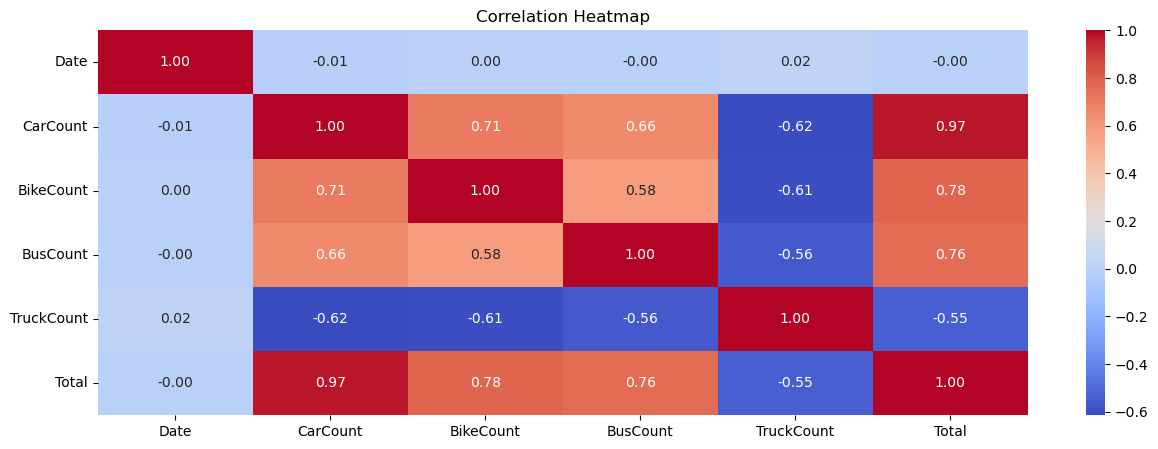

In [8]:
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [10]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [67]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
df['Time']=label.fit_transform(df['Time'])
df['Day of the week']=label.fit_transform(df['Day of the week'])
df['Traffic Situation']=label.fit_transform(df['Traffic Situation'])

In [68]:
x= df.drop('Traffic Situation',axis=1)
y=df['Traffic Situation']

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=1)

In [14]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [43]:
svm_pred=svm.predict(x_test)


In [16]:
svm.score(x_test,y_test)

0.9161073825503355

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


In [18]:
kernel1=SVC(kernel='linear')
kernel1.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
kernel1.score(x_test,y_test)

0.8926174496644296

In [20]:
kernel2=SVC(kernel='poly')
kernel2.fit(x_train,y_train)

SVC(kernel='poly')

In [21]:
kernel2.score(x_test,y_test)

0.8557046979865772

In [22]:
kernel3=SVC(kernel='rbf')
kernel3.fit(x_train,y_train)

SVC()

In [23]:
kernel3.score(x_test,y_test)

0.9161073825503355

In [24]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\jabeen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
logistic_prediction=logistic.predict(x_test)


In [26]:
logistic.score(x_test,y_test)

0.7751677852348994

Text(0, 0.5, 'Data values')

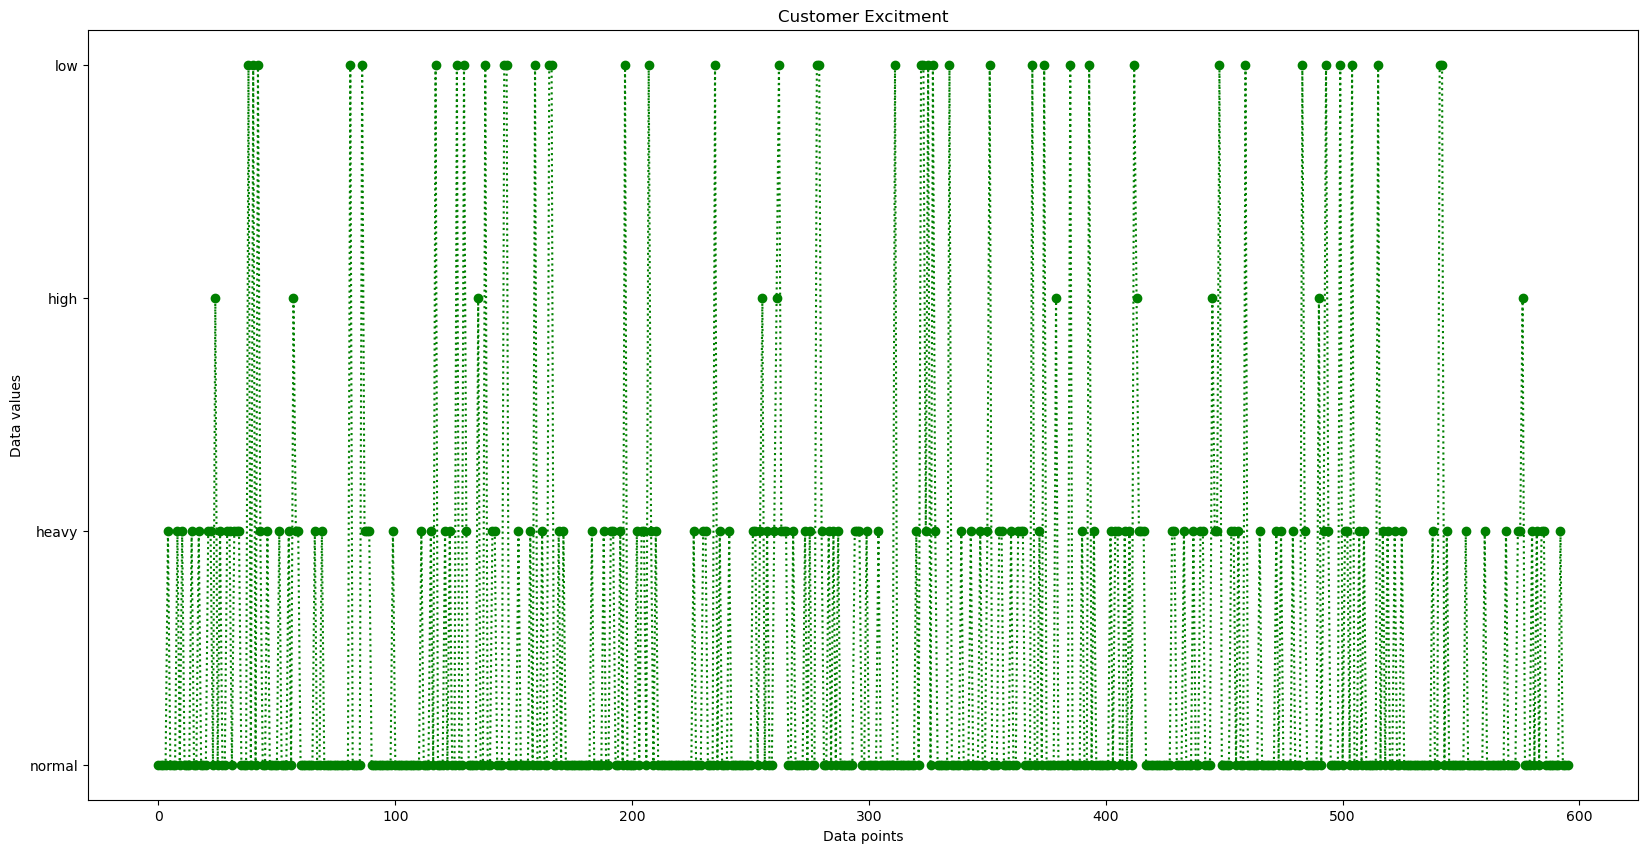

In [28]:
plt.figure(figsize=(20,10))

plt.plot(logistic_prediction,color='green',linestyle=':',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [27]:
logistic.score(x_test,y_test)

0.7751677852348994

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [31]:
knn.score(x_test,y_test)

0.9312080536912751

In [32]:
accuracy_rate=[]
for i in range(1,40):


    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    accuracy_rate.append(score)

Text(0, 0.5, 'accuracy_rate')

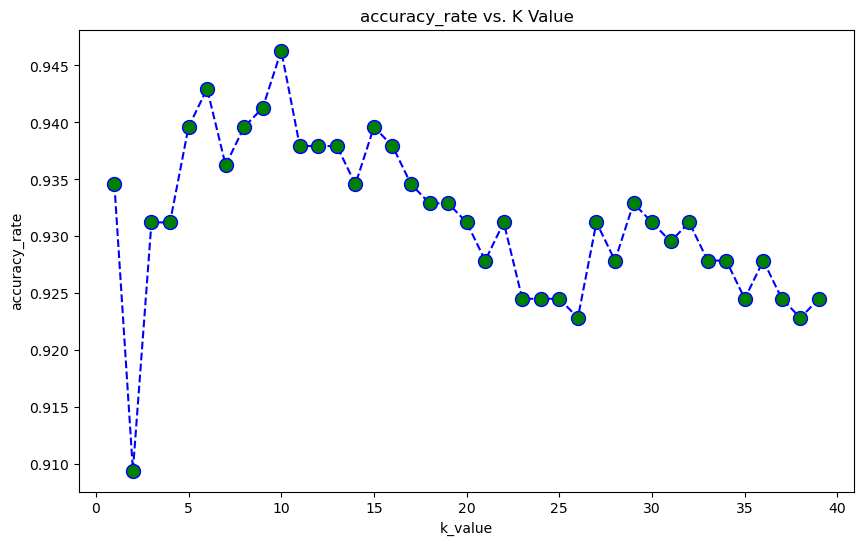

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='green',markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('k_value')
plt.ylabel('accuracy_rate')

In [34]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

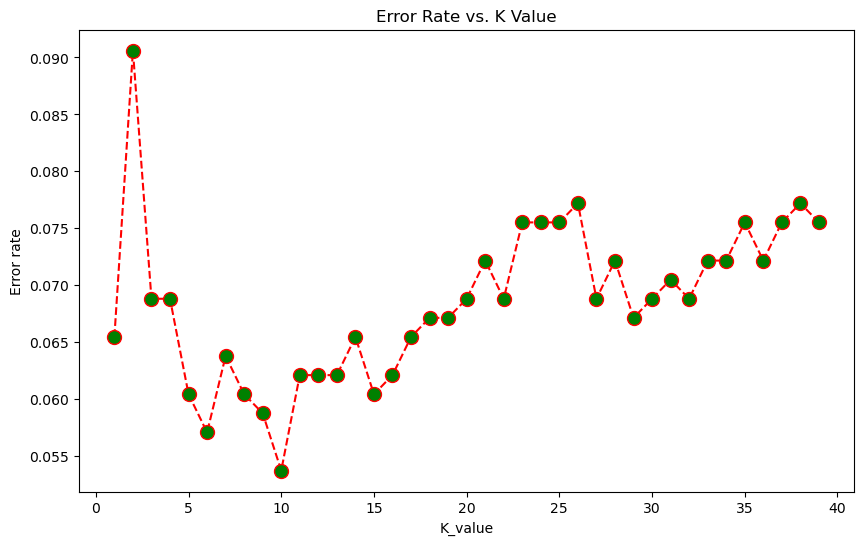

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',marker='o',linestyle='dashed',
        markerfacecolor='green',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Error rate')

In [45]:
knn_x=KNeighborsClassifier(n_neighbors=6)
knn_x.fit(x_train,y_train)
knn_x.score(x_test,y_test)

0.9429530201342282

In [46]:
knn_y=KNeighborsClassifier(n_neighbors=8)
knn_y.fit(x_train,y_train)
knn_y.score(x_test,y_test)

0.9395973154362416

In [47]:
knn_z=KNeighborsClassifier(n_neighbors=9)
knn_z.fit(x_train,y_train)
knn_z.score(x_test,y_test)

0.9412751677852349

In [48]:
knn_predict=knn_x.predict(x_test)


Text(0, 0.5, 'Data values')

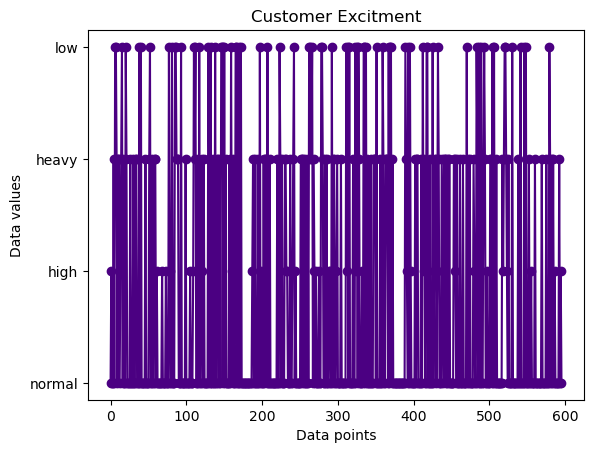

In [49]:
plt.plot(knn_predict,color='indigo',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [50]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [51]:
guassian_pred=naive.predict(x_test)
guassian_pred

array(['normal', 'normal', 'normal', 'high', 'heavy', 'high', 'low',
       'normal', 'heavy', 'normal', 'heavy', 'heavy', 'normal', 'heavy',
       'heavy', 'normal', 'high', 'heavy', 'normal', 'normal', 'normal',
       'heavy', 'heavy', 'high', 'normal', 'normal', 'heavy', 'normal',
       'normal', 'heavy', 'heavy', 'normal', 'normal', 'heavy', 'heavy',
       'normal', 'normal', 'high', 'low', 'normal', 'normal', 'normal',
       'high', 'heavy', 'normal', 'normal', 'heavy', 'high', 'normal',
       'normal', 'normal', 'heavy', 'normal', 'normal', 'normal', 'heavy',
       'normal', 'normal', 'heavy', 'heavy', 'high', 'high', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'heavy', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'high', 'normal', 'high', 'low',
       'normal', 'high', 'normal', 'low', 'low', 'heavy', 'heavy',
       'heavy', 'normal', 'normal', 'normal', 'low', 'normal', 'normal',
       '

Text(0, 0.5, 'Data values')

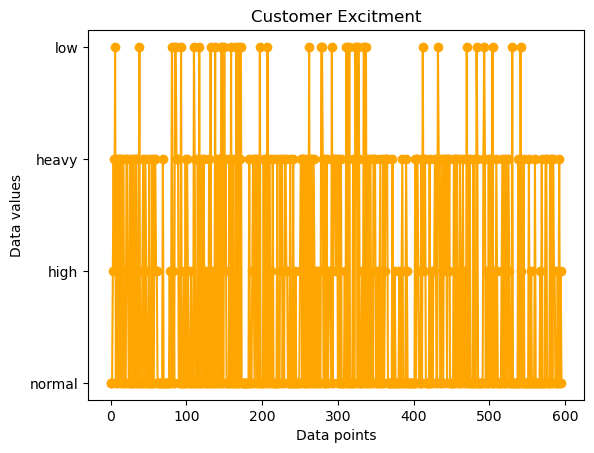

In [52]:
plt.plot(guassian_pred,color='orange',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [53]:
naive.score(x_test,y_test)

0.8003355704697986

In [54]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
random_pred=random.predict(x_test)
random_pred

array(['normal', 'high', 'normal', 'normal', 'heavy', 'normal', 'low',
       'normal', 'heavy', 'normal', 'heavy', 'heavy', 'normal', 'heavy',
       'heavy', 'low', 'normal', 'heavy', 'normal', 'normal', 'normal',
       'heavy', 'normal', 'normal', 'normal', 'normal', 'heavy', 'normal',
       'normal', 'normal', 'heavy', 'normal', 'normal', 'heavy', 'heavy',
       'normal', 'normal', 'normal', 'low', 'normal', 'low', 'high',
       'normal', 'normal', 'normal', 'normal', 'heavy', 'normal',
       'normal', 'normal', 'normal', 'heavy', 'normal', 'normal',
       'normal', 'heavy', 'normal', 'normal', 'heavy', 'heavy', 'normal',
       'high', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'high', 'normal', 'normal', 'normal', 'normal', 'high', 'normal',
       'normal', 'normal', 'low', 'high', 'normal', 'normal', 'low',
       'normal', 'high', 'normal', 'low', 'low', 'heavy', 'heavy',
       'heavy', 'low', 'normal', 'normal', 'low', 'normal', 'normal',
      

In [56]:
random.score(x_test,y_test)

0.9949664429530202

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
decision_pred=tree.predict(x_test)

In [59]:
tree.score(x_test,y_test)

0.9966442953020134

In [70]:
import xgboost as xgb
boost=xgb.XGBClassifier()
boost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [71]:
boost_pred=boost.predict(x_test)

In [72]:
boost.score(x_test,y_test)

1.0

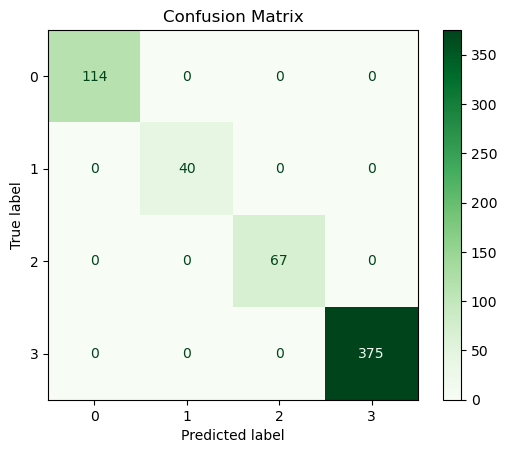

In [73]:
cm = confusion_matrix(y_test, boost_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

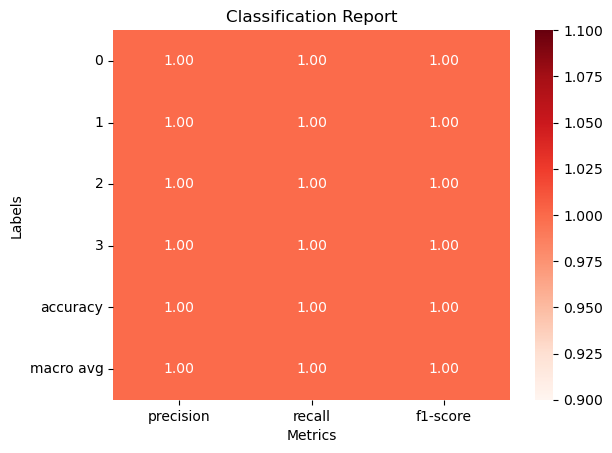

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as dictionary
report = classification_report(y_test, boost_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the basic heatmap
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Reds')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [63]:

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1, 5, 10]
}

gdc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, return_train_score=True)

In [64]:
gdc

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10]}, return_train_score=True)

In [65]:
gdc.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10]}, return_train_score=True)

In [66]:
gdc.best_params_

{'n_estimators': 10}

In [57]:
from sklearn import svm

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params': {
            'gamma': [1, 10, 20],
            'C': [1, 10, 20],
            'kernel': ['rbf', 'poly', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    }
}


In [ ]:
scores = []  

for model_name in model_params:
    mp = model_params[model_name]  
    gds = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    gds.fit(x, y)  
    scores.append({
        'model': model_name,
        'best_score': gds.best_score_,
        'best_params': gds.best_params_
    })


In [ ]:
scores

In [ ]:
models={'logistic':{'model':LogisticRegression(),'params':{}},
        'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},
        'Gaussian':{'model':GaussianNB(),'params':{}},
        'SVM':{'model':SVC(),'params':{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['poly','linear','sigmoid','rbf']}}}


In [ ]:
result=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x,y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result.append(t_res)
        